##**Pythonで視覚化②：wine :classification**
Pythonで視覚化② で使用するデータセットは、scikit-leanという機械学習ライブラリで用意されているデータセットリストにある [wine] データセットです。

###**このデータセットについて**
[wine] データセットは、イタリアの同じ地域で栽培された3種類の異なるワインの化学分析の結果で、「アルコール度数や各種成分、色の濃さなど」の13個のデータ項目（特徴量）と、「ワインの種類（3種類）」のデータです。
データ項目は英字表記ですが、以下ではイメージしやすくするために日本語表記としています。

- データ項目（特徴量）：アルコール度数、リンゴ酸、灰分、アルカリ度、マグネシウム、全フェノール含量、フラバノイド、非フラバノイドフェノール、プロアントシアニン、色の濃さ、色相、280nm と 315nm の吸光度の比、プロリン
- ターゲット（目的変数）：3種類のワイン（class_0, class_1,class_2）

###**手順**
- 「1．インストール」の「▷」をクリックしてください。（インストールが実行されます）。
- Select_Datasetのドロップダウンメニュー(dataset:)で[wine :classification]を選択してください。
- Load dataset の「▷」をクリックしてください。（データセットが読み込まれます）。

## **1．インストール**

In [ ]:
!pip install seaborn-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 4.8 MB/s 
     |████████████████████████████████| 2.0 MB 15.5 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
!pip install pandas-bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **2．データセット読込み**

In [ ]:
#@title Select_Dataset { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：かならず 実行する前に 設定してください。**</font>

dataset = 'wine :classification' #@param ['Boston_housing :regression', 'Diabetes :regression', 'Breast_cancer :binary','Titanic :binary', 'Titanic(seaborn) :binary', 'Iris :classification', 'Loan_prediction :binary','wine :classification', 'Occupancy_detection :binary', 'Upload']

In [ ]:
#@title Load dataset

#ライブラリインポート
#import numpy as np    #数値計算ライブラリ
import pandas as pd   #データを効率的に扱うライブラリ
import seaborn as sns #視覚化ライブラリ
import warnings       #警告を表示させないライブラリ
warnings.simplefilter('ignore')

'''
dataset（ドロップダウンメニュー）で選択したデータセットを読込み、データフレーム（df）に格納。
目的変数は、データフレームの最終列とし、FEATURES、TARGET、X、yを指定した後、データフレーム
に関する情報と先頭5列を表示。
任意のcsvデータを読込む場合は、datasetで'Upload'を選択。

'''

#任意のcsvデータ読込み及びデータフレーム格納、
if dataset =='Upload':
  from google.colab import files
  uploaded = files.upload()#Upload
  target = list(uploaded.keys())[0]
  df = pd.read_csv(target)

#Diabetes データセットの読込み及びデータフレーム格納、
elif dataset == "Diabetes :regression":
  from sklearn.datasets import load_diabetes
  diabetes = load_diabetes()
  df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
  df['target'] = diabetes.target

#Breast_cancer データセットの読込み及びデータフレーム格納、
elif dataset == "Breast_cancer :binary":
  from sklearn.datasets import load_breast_cancer
  breast_cancer = load_breast_cancer()
  df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
  #df['target'] = breast_cancer.target  #目的変数をカテゴリー数値とする時
  df['target'] = breast_cancer.target_names[breast_cancer.target]

#Titanic データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic :binary":
  data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
  df = pd.read_csv(data_url)
  #目的変数 Survived をデータフレーム最終列に移動
  X = df.drop(['Survived'], axis=1)
  y = df['Survived'] 
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#Titanic(seaborn) データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic(seaborn) :binary":
  df = sns.load_dataset('titanic')
  #重複データをカットし、目的変数 alive をデータフレーム最終列に移動
  X = df.drop(['survived','pclass','embarked','who','adult_male','alive'], axis=1)
  y = df['alive']                   #目的変数データ
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#iris データセットの読込み及びデータフレーム格納、
elif dataset == "Iris :classification":
  from sklearn.datasets import load_iris
  iris = load_iris()
  df = pd.DataFrame(iris.data, columns = iris.feature_names)
  #df['target'] = iris.target  #目的変数をカテゴリー数値とする時
  df['target'] = iris.target_names[iris.target]

#wine データセットの読込み及びデータフレーム格納、
elif dataset == "wine :classification":
  from sklearn.datasets import load_wine
  wine = load_wine()
  df = pd.DataFrame(wine.data, columns = wine.feature_names)
  #df['target'] = wine.target  #目的変数をカテゴリー数値とする時
  df['target'] = wine.target_names[wine.target]

#Loan_prediction データセットの読込み及びデータフレーム格納、 
elif dataset == "Loan_prediction :binary":
  data_url = "https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/raw/master/train.csv"
  df = pd.read_csv(data_url)

#Occupancy_detection データセットの読込み及びデータフレーム格納、 
elif dataset =='Occupancy_detection :binary':
  data_url = 'https://raw.githubusercontent.com/hima2b4/Auto_Profiling/main/Occupancy-detection-datatest.csv'
  df = pd.read_csv(data_url)
  df['date'] = pd.to_datetime(df['date'])    #[date]のデータ型をdatetime型に変更

#Boston データセットの読込み及びデータフレーム格納 
else:
  from sklearn.datasets import load_boston
  boston = load_boston()
  df = pd.DataFrame(boston.data, columns = boston.feature_names)
  df['target'] = boston.target

#FEATURES、TARGET、X、yを指定 
FEATURES = df.columns[:-1]    #説明変数のデータ項目を指定
TARGET = df.columns[-1]       #目的変数のデータ項目を指定
X = df.loc[:, FEATURES]       #FEATURESのすべてのデータをXに格納
y = df.loc[:, TARGET]         #TARGETのすべてのデータをyに格納

#データフレーム表示
df.info(verbose=True)         #データフレーム情報表示（verbose=Trueで表示数制限カット）
df.head()                     #データフレーム先頭5行表示

In [ ]:
#@title Datasetの数字・文字列区分

numerical_col = []
Object_col = []

for col_name, item in df.iteritems():
    if item.dtype == object:
        Object_col.append(col_name)
    else:
        numerical_col.append(col_name)
        
print('-----------------------------------------------------------------------------------------')
print('Numerical_columns:', numerical_col)
print('-----------------------------------------------------------------------------------------')
print('Object_columns:', Object_col)
print('-----------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------------
Numerical_columns: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
-----------------------------------------------------------------------------------------
Object_columns: ['target']
-----------------------------------------------------------------------------------------


### **Pairplot**

<Figure size 432x288 with 0 Axes>

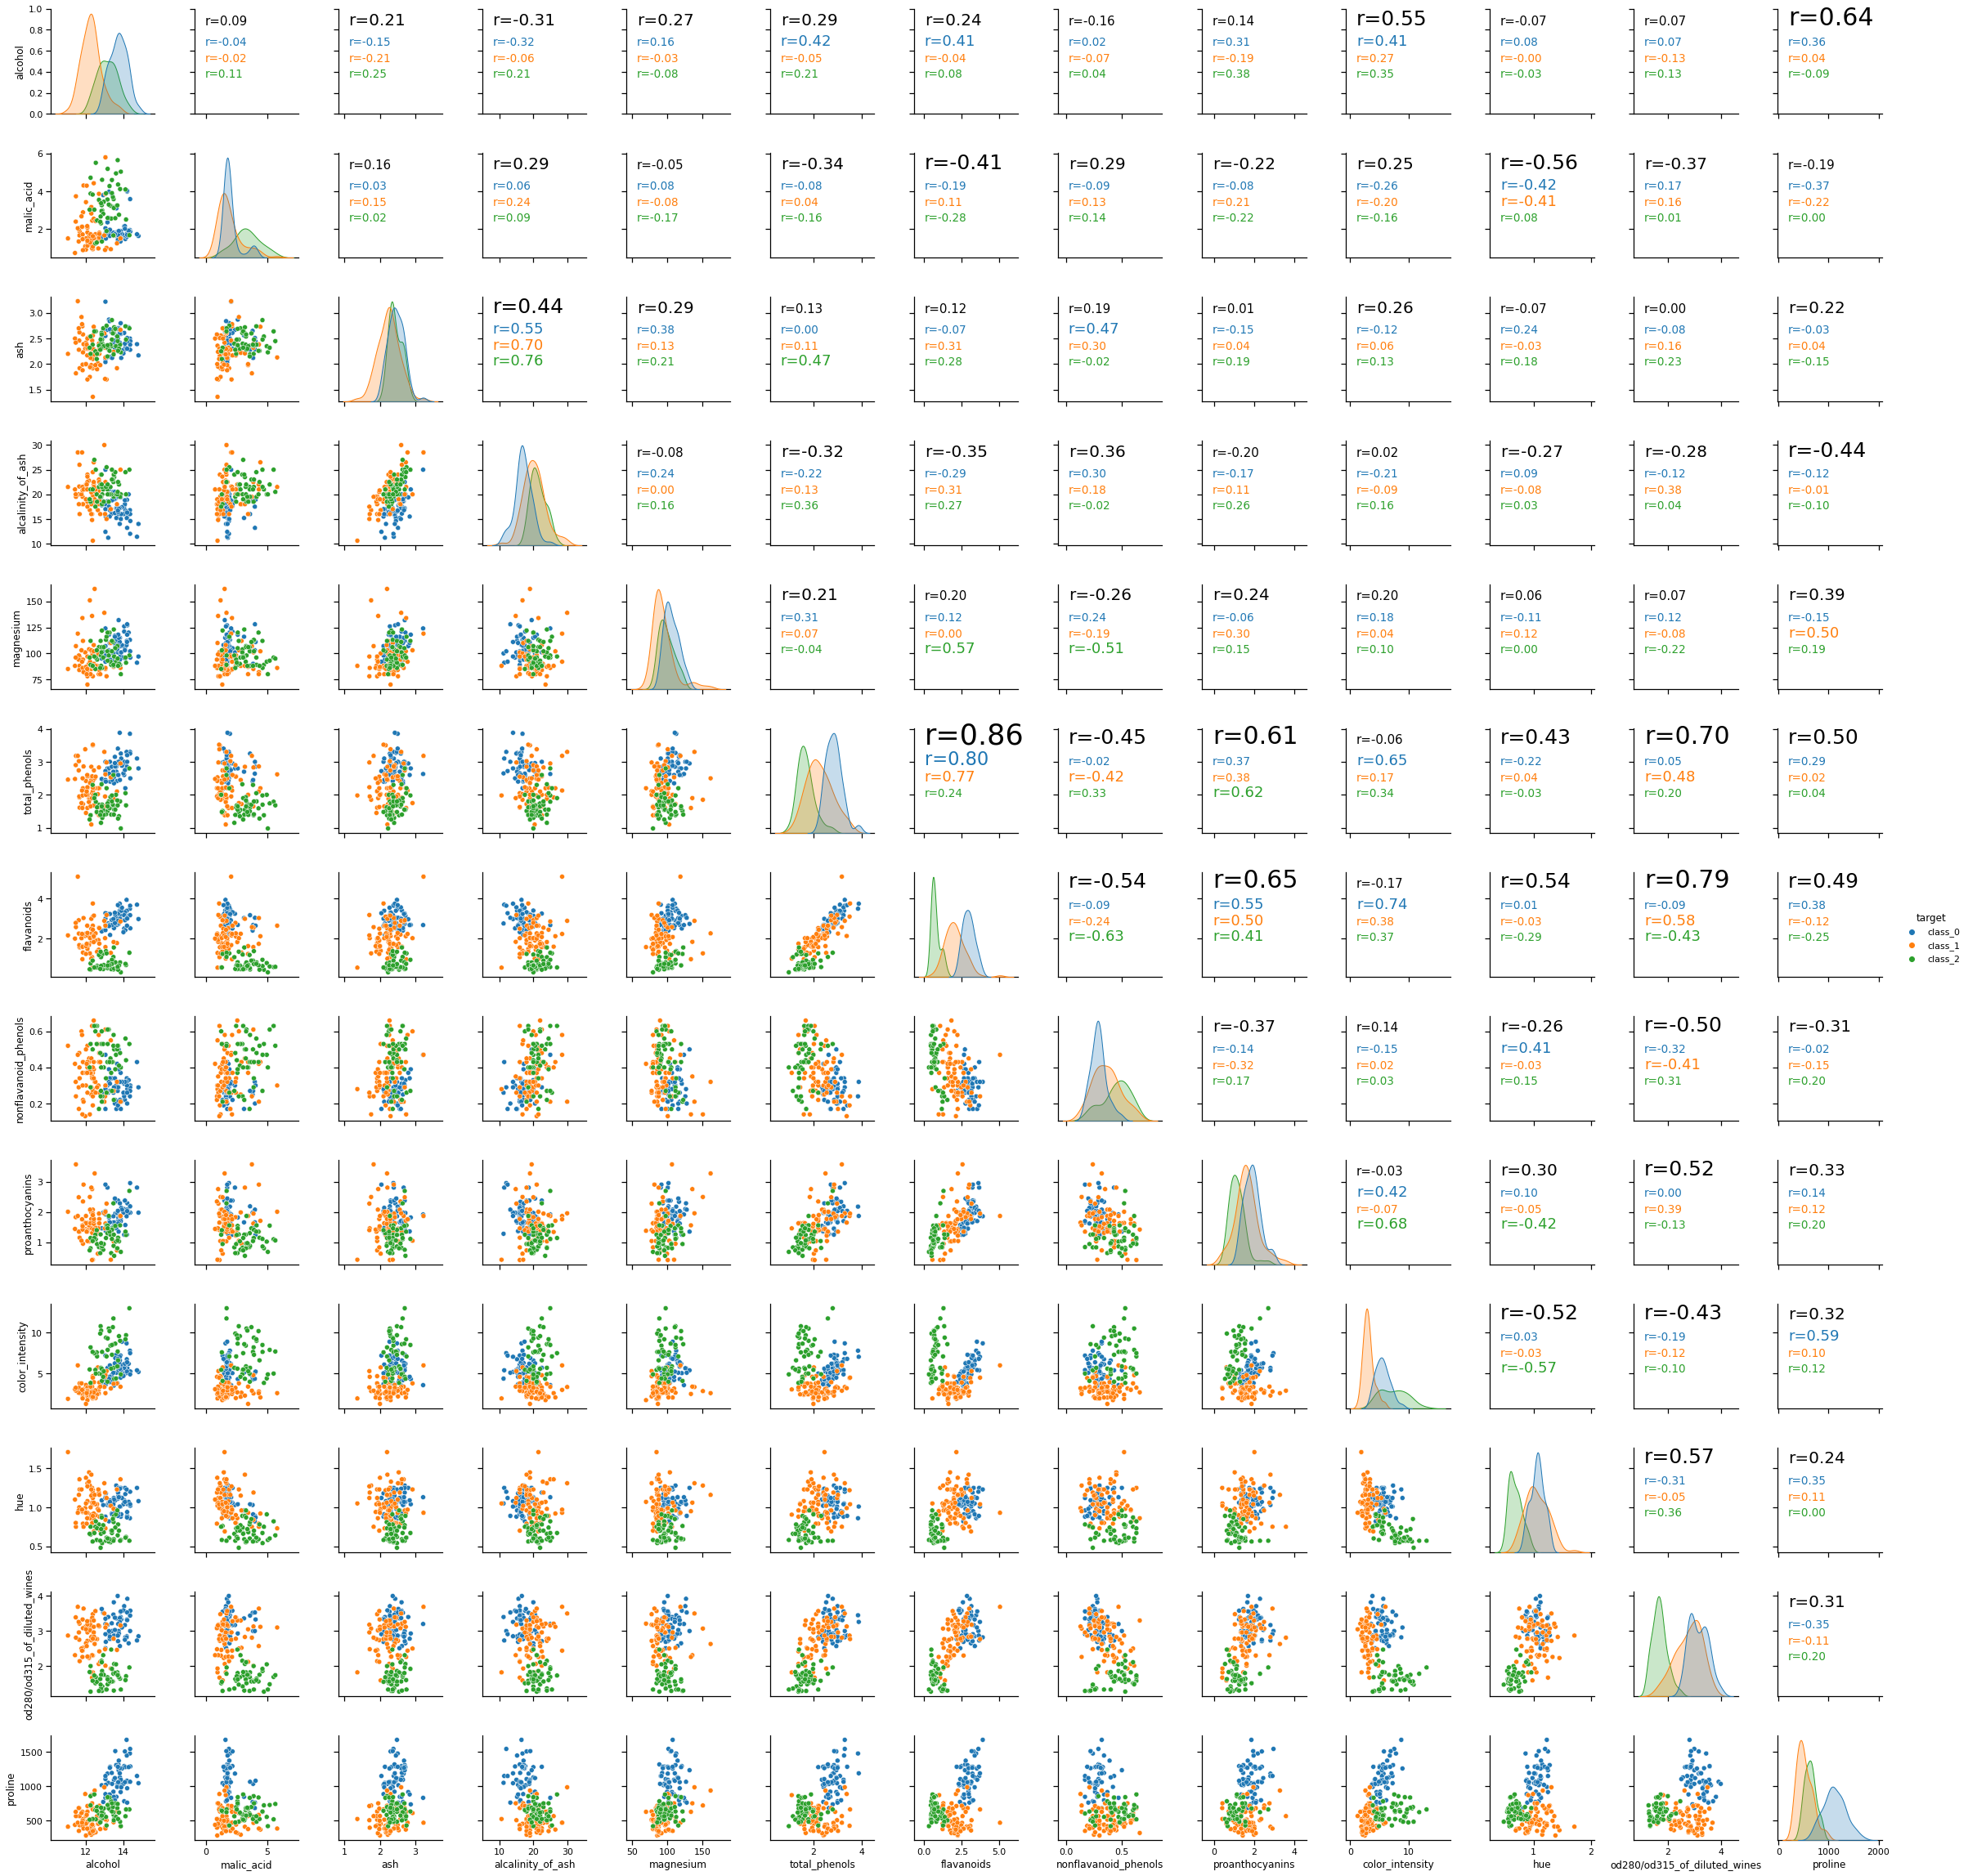

In [ ]:
#@title Pairplot_classification

from seaborn_analyzer import CustomPairPlot

cp = CustomPairPlot()
cp.pairanalyzer(df, hue=TARGET)

## **3．視覚化**

### **ヒストグラム**

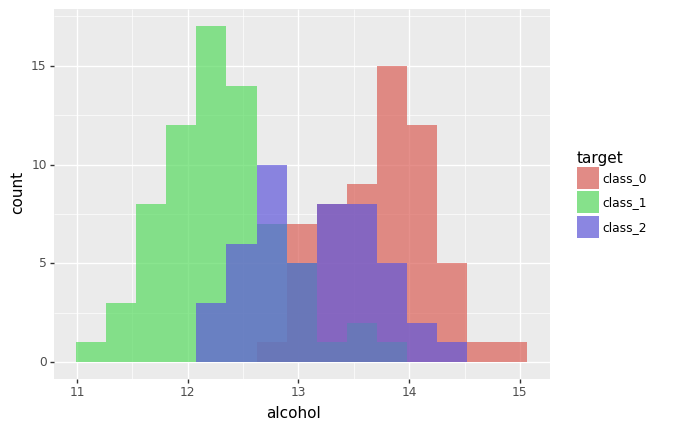

<ggplot: (8771779832449)>

In [ ]:
#@title Stratified histogram by category_plotnine

Column_name =  'alcohol'#@param {type:"raw"}
Category_column_name =  'target'#@param {type:"raw"}
bins_number_slider = 15 #@param {type:"slider", min:5, max:20, step:1}

from plotnine import *

(ggplot(df, aes(Column_name, fill = Category_column_name)) 
 + geom_histogram(bins = bins_number_slider, position = "identity", alpha = 0.7)) 

###**箱ひげ図**

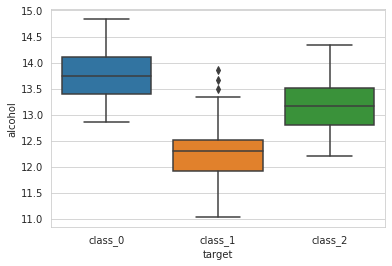

In [ ]:
#@title Stratified box-plot by category_seaborn

Column_name =  'alcohol'#@param {type:"raw"}
Category_column_name =  'target'#@param {type:"raw"}

import seaborn as sns

sns.set_style('whitegrid') #style指定
sns.boxplot(x=Category_column_name, y=Column_name, data=df);

### **散布図**

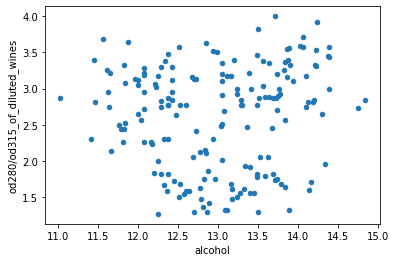

In [ ]:
#@title Scatter-plot_pandas(matplotlib)

X_column_name =  'alcohol'#@param {type:"raw"}
y_column_name =  'od280/od315_of_diluted_wines'#@param {type:"raw"}

#df.plot.scatter(x=X_column_name, y=y_column_name);
df.plot(kind='scatter',x=X_column_name, y=y_column_name);

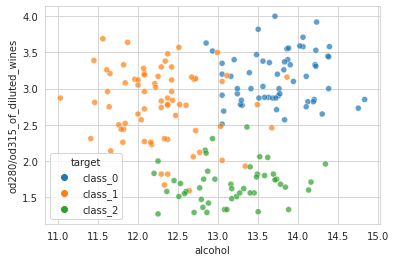

In [ ]:
#@title Scatter-plot_seaborn

X_column_name =  'alcohol'#@param {type:"raw"}
y_column_name =  'od280/od315_of_diluted_wines'#@param {type:"raw"}
Stratified_column_name =  'target'#@param {type:"raw"}

#視覚化ライブラリインポート
import seaborn as sns
#import matplotlib.pyplot as plt

sns.set_style('whitegrid') #style指定
sns.scatterplot(x=X_column_name, y=y_column_name, data=df, 
alpha=0.7, hue=Stratified_column_name);

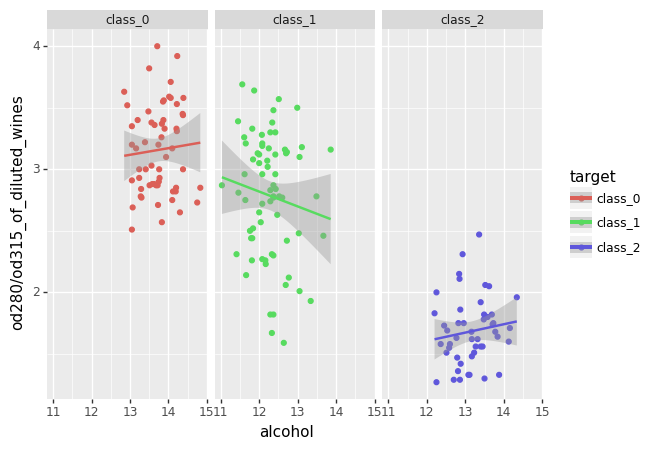

<ggplot: (8771780024973)>

In [ ]:
#@title Scatter-plot for each target variable with linear regression_plotnine

X_column_name =  'alcohol'#@param {type:"raw"}
y_column_name =  'od280/od315_of_diluted_wines'#@param {type:"raw"}
Stratified_column_name =  'target'#@param {type:"raw"}

from plotnine import *

(ggplot(df, aes(x=X_column_name, y=y_column_name, color = Stratified_column_name))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap(Stratified_column_name))

### **Joint-plot**

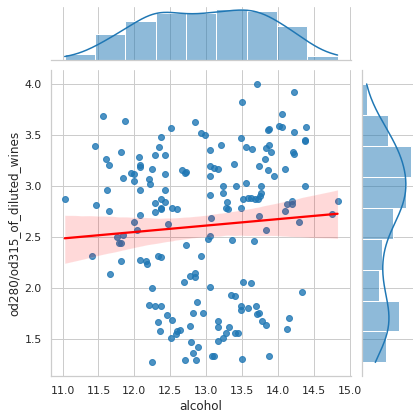

In [ ]:
#@title Joint-plot_seaborn

X_column_name =  'alcohol'#@param {type:"raw"}
y_column_name =  'od280/od315_of_diluted_wines'#@param {type:"raw"}

#視覚化ライブラリインポート
import seaborn as sns
#import matplotlib.pyplot as plt

sns.set_style('whitegrid') #style指定
sns.jointplot(data=df, x=X_column_name, y=y_column_name, 
              kind="reg", line_kws={"color":"red"});

In [ ]:
#@title Stratified scatter-plot by target_pandas-bokeh

X_column_name =  'alcohol'#@param {type:"raw"}
y_column_name =  'od280/od315_of_diluted_wines'#@param {type:"raw"}
Stratified_column_name =  'target'#@param {type:"raw"}

import pandas_bokeh
pandas_bokeh.output_notebook()

#df.plot_bokeh(kind='scatter',x=X_column_name,y=y_column_name,category="target")
df.plot_bokeh(kind='scatter',x=X_column_name,y=y_column_name,category=Stratified_column_name)

Figure(id='1667', ...)